In [1]:
import pandas as pd

In [2]:
sample_submission = pd.read_csv("Data/sample_submission.csv")
sample_submission

,ride_id,number_of_ticket
0,247,4.0
1,256,2.0
2,275,5.0
3,285,7.0
4,286,9.0
...,...,...
1106,15336,NaN
1107,15337,NaN
1108,15338,NaN
1109,15339,NaN


In [3]:
test_questions = pd.read_csv("Data/test_questions.csv")
test_questions

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11
...,...,...,...,...,...,...,...
1106,15336,2018-05-07,07:01,Oyugis,Nairobi,Bus,49
1107,15337,2018-05-07,07:08,Kehancha,Nairobi,Bus,49
1108,15338,2018-05-07,07:04,Rongo,Nairobi,Bus,49
1109,15339,2018-05-07,07:05,Ndhiwa,Nairobi,Bus,49


In [4]:
train_revised = pd.read_csv("Data/train_revised.csv")
train_revised.drop(columns = ["seat_number", "payment_method", "payment_receipt"], inplace=True)

In [5]:
train_revised.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,27-11-17,7:12,Migori,Nairobi,Bus,49


In [6]:
train_revised.groupby("ride_id", as_index=False).count()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,1,1,1,1,1,1
1,5437,1,1,1,1,1,1
2,5710,1,1,1,1,1,1
3,5777,5,5,5,5,5,5
4,5778,31,31,31,31,31,31
...,...,...,...,...,...,...,...
6244,20113,9,9,9,9,9,9
6245,20114,4,4,4,4,4,4
6246,20115,5,5,5,5,5,5
6247,20116,1,1,1,1,1,1


In [7]:
train_revised.drop_duplicates("ride_id")

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,27-11-17,7:12,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...
51575,13812,20-04-18,23:10,Ndhiwa,Nairobi,Bus,49
51605,13813,20-04-18,7:05,Ndhiwa,Nairobi,Bus,49
51639,13825,20-04-18,7:09,Rongo,Nairobi,Bus,49
51640,13826,20-04-18,8:00,Awendo,Nairobi,Bus,49


In [8]:
tickets  = train_revised.groupby("ride_id", as_index=False).count().iloc[: , 1]
tickets

0        1
1        1
2        1
3        5
4       31
        ..
6244     9
6245     4
6246     5
6247     1
6248     1
Name: travel_date, Length: 6249, dtype: int64

In [9]:
train_revised.drop_duplicates("ride_id", inplace=True)
train_revised.reset_index(inplace=True)
train_revised

,index,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,0,1442,17-10-17,7:15,Migori,Nairobi,Bus,49
1,1,5437,19-11-17,7:12,Migori,Nairobi,Bus,49
2,2,5710,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,3,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,4,5778,27-11-17,7:12,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...
6244,51575,13812,20-04-18,23:10,Ndhiwa,Nairobi,Bus,49
6245,51605,13813,20-04-18,7:05,Ndhiwa,Nairobi,Bus,49
6246,51639,13825,20-04-18,7:09,Rongo,Nairobi,Bus,49
6247,51640,13826,20-04-18,8:00,Awendo,Nairobi,Bus,49


In [10]:
train_revised["tickets"] = tickets

In [11]:
train_revised

,index,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,tickets
0,0,1442,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,1,5437,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,2,5710,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,3,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,4,5778,27-11-17,7:12,Migori,Nairobi,Bus,49,31
...,...,...,...,...,...,...,...,...,...
6244,51575,13812,20-04-18,23:10,Ndhiwa,Nairobi,Bus,49,9
6245,51605,13813,20-04-18,7:05,Ndhiwa,Nairobi,Bus,49,4
6246,51639,13825,20-04-18,7:09,Rongo,Nairobi,Bus,49,5
6247,51640,13826,20-04-18,8:00,Awendo,Nairobi,Bus,49,1


In [12]:
train_revised["travel_date"] = pd.to_datetime(train_revised.travel_date, errors="coerce")

In [13]:
import seaborn as sns

In [14]:
train_revised["travel_time"]

0        7:15
1        7:12
2        7:05
3        7:10
4        7:12
        ...  
6244    23:10
6245     7:05
6246     7:09
6247     8:00
6248     5:10
Name: travel_time, Length: 6249, dtype: object

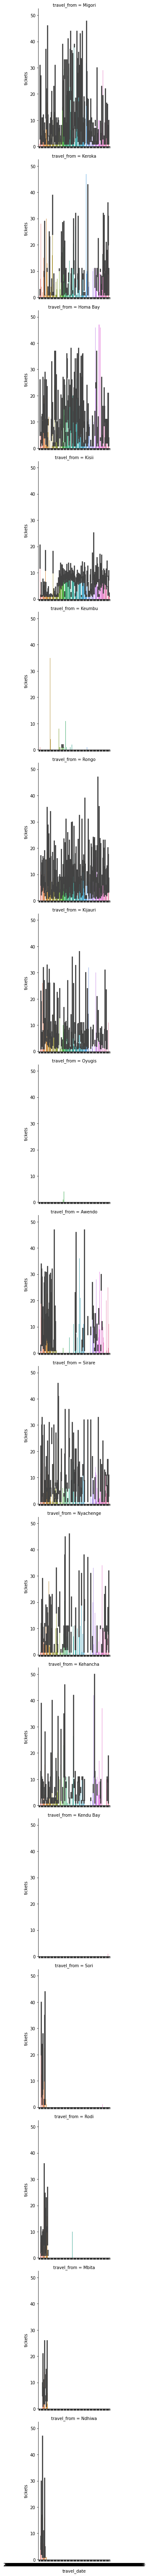

In [15]:
sns.catplot(x = "travel_date", y = "tickets", data = train_revised, row = "travel_from", kind = "bar")